<a href="https://colab.research.google.com/github/pras-4795/JPMCColab/blob/main/MLE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import ssl
import certifi

ssl._create_default_https_context = ssl._create_default_https_context
dataset = fetch_openml(data_id=40945, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
dataset.DESCR

'**Author**: Frank E. Harrell Jr., Thomas Cason  \n**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  \n**Please cite**:   \n\nThe original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.\n\nThomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new v

In [ ]:
df = dataset.frame
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,3.0,0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,None,S,None,NaN,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    object  
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


In [ ]:
master = df.copy()

In [ ]:
labels = df['survived']
df.drop(['survived'], axis=1, inplace=True)


In [ ]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


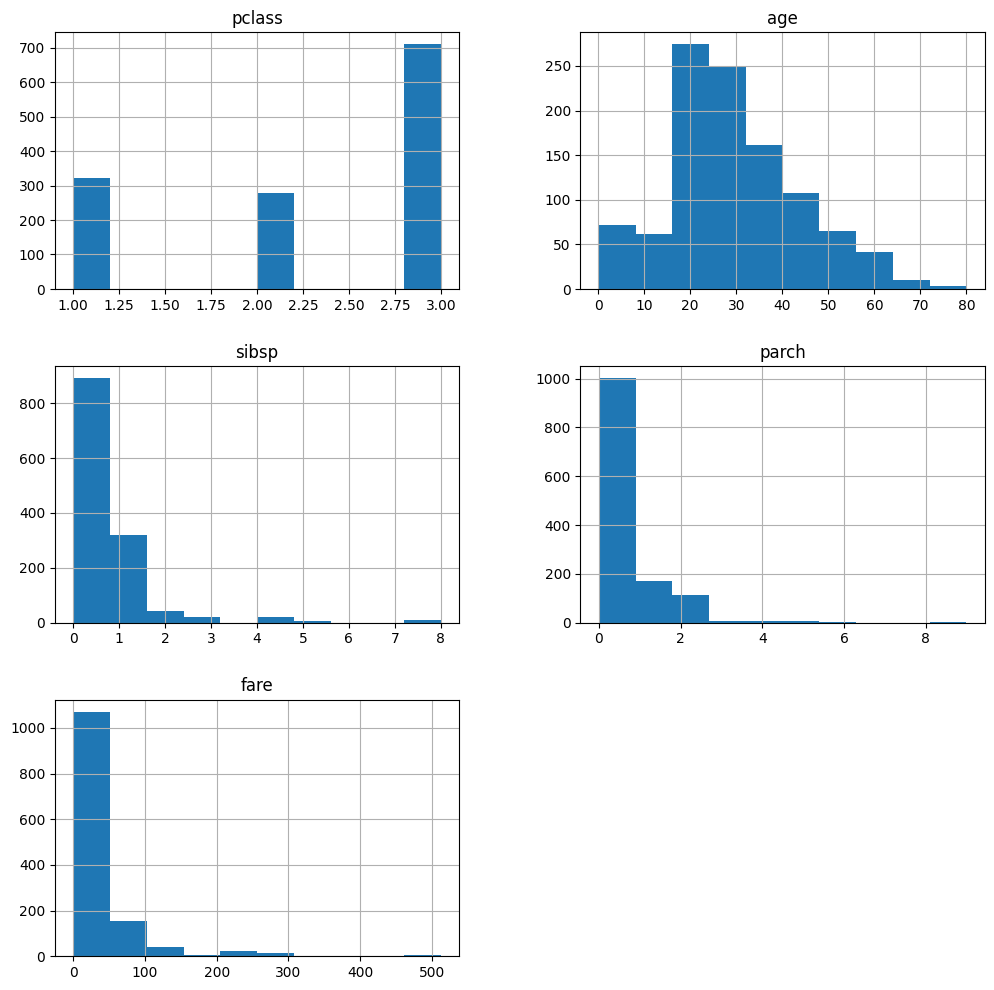

In [ ]:
df.hist(figsize=(12,12))
plt.show()

In [ ]:
df['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [ ]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [ ]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [ ]:
df = master.copy()
df['survived'] = df['survived'].astype('int')
corr_matrix = df.corr()

<ipython-input-13-5038494e9b37>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
corr_matrix['survived'].sort_values()
#pclass has more chance to survive than third class

pclass     -0.312469
age        -0.055513
sibsp      -0.027825
parch       0.082660
fare        0.244265
survived    1.000000
Name: survived, dtype: float64

In [ ]:
df['sex'] = df['sex'].astype('object')

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
sex_encoder = LabelEncoder()
#sex_encoder.fit(df['sex'])
df['sex'] = sex_encoder.fit_transform(df['sex'])

In [ ]:
#df['sex'] = sex_encoder.transform(df['sex'])
#df.head()
#inverse_transform to turn 1's and 0's into Male, female
#fit_transform does fit and  transform in single step

In [ ]:
df['embarked'] = df['embarked'].fillna('S').astype('object')

emabrked_encoder = LabelEncoder()
df['embarked'] = emabrked_encoder.fit_transform(df['embarked'])

In [ ]:
df['fare'] = df['fare'].fillna(0.0)

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1309 non-null   int64  
 11  boat       486 non-null    object 
 12  body       121 non-null    object 
 13  home.dest  745 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 143.3+ KB


In [ ]:
df2 = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0,0,25.0000,1.0,2.0,151.5500,2


In [ ]:
labels = df2['survived']
features = df2.drop(['survived'], axis = 1)

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   sex       1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   float64
 4   parch     1309 non-null   float64
 5   fare      1309 non-null   float64
 6   embarked  1309 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 71.7 KB


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

In [ ]:
models = [
    ['LogisticRegression', LogisticRegression()],
    ['KNeighborsClassifier', KNeighborsClassifier()],
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['SVC', SVC()],
    ['RandomForestClassifier', RandomForestClassifier()],
    ['GaussianNB', GaussianNB()],
]

In [ ]:
import warnings

warnings.filterwarnings('ignore')

for name, model in models:
  scores = cross_val_score(model, features, labels, cv=10)
  print(f'{name} = {scores.mean() * 100}')

LogisticRegression = 76.85261303581913
KNeighborsClassifier = 64.71051086318262
DecisionTreeClassifier = 71.04815032295949
SVC = 65.92483852025836
RandomForestClassifier = 74.63358778625955
GaussianNB = 74.10569583088666


In [ ]:
#first 5 steps done